In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Define the fitting models

In [2]:
# Define a general hyperbolic tangent model
def area_tanh(t, a, b, c, d):
    """
    t: time
    a,b,c,d: constants to be fitted
    """
    return a*np.tanh(b*(t-c))+d

# Define the logistic growth rate model
def area_logistic(t, a0, r, k):
    """
    t  :time
    a0 : area at time zer0
    r  : growth rate
    k  : carrying capacity
    """
    return k*a0 / (a0 + (k-a0)*np.exp(-r*t))

### Read the data frame and show a summary of the growth curves and the fitting models

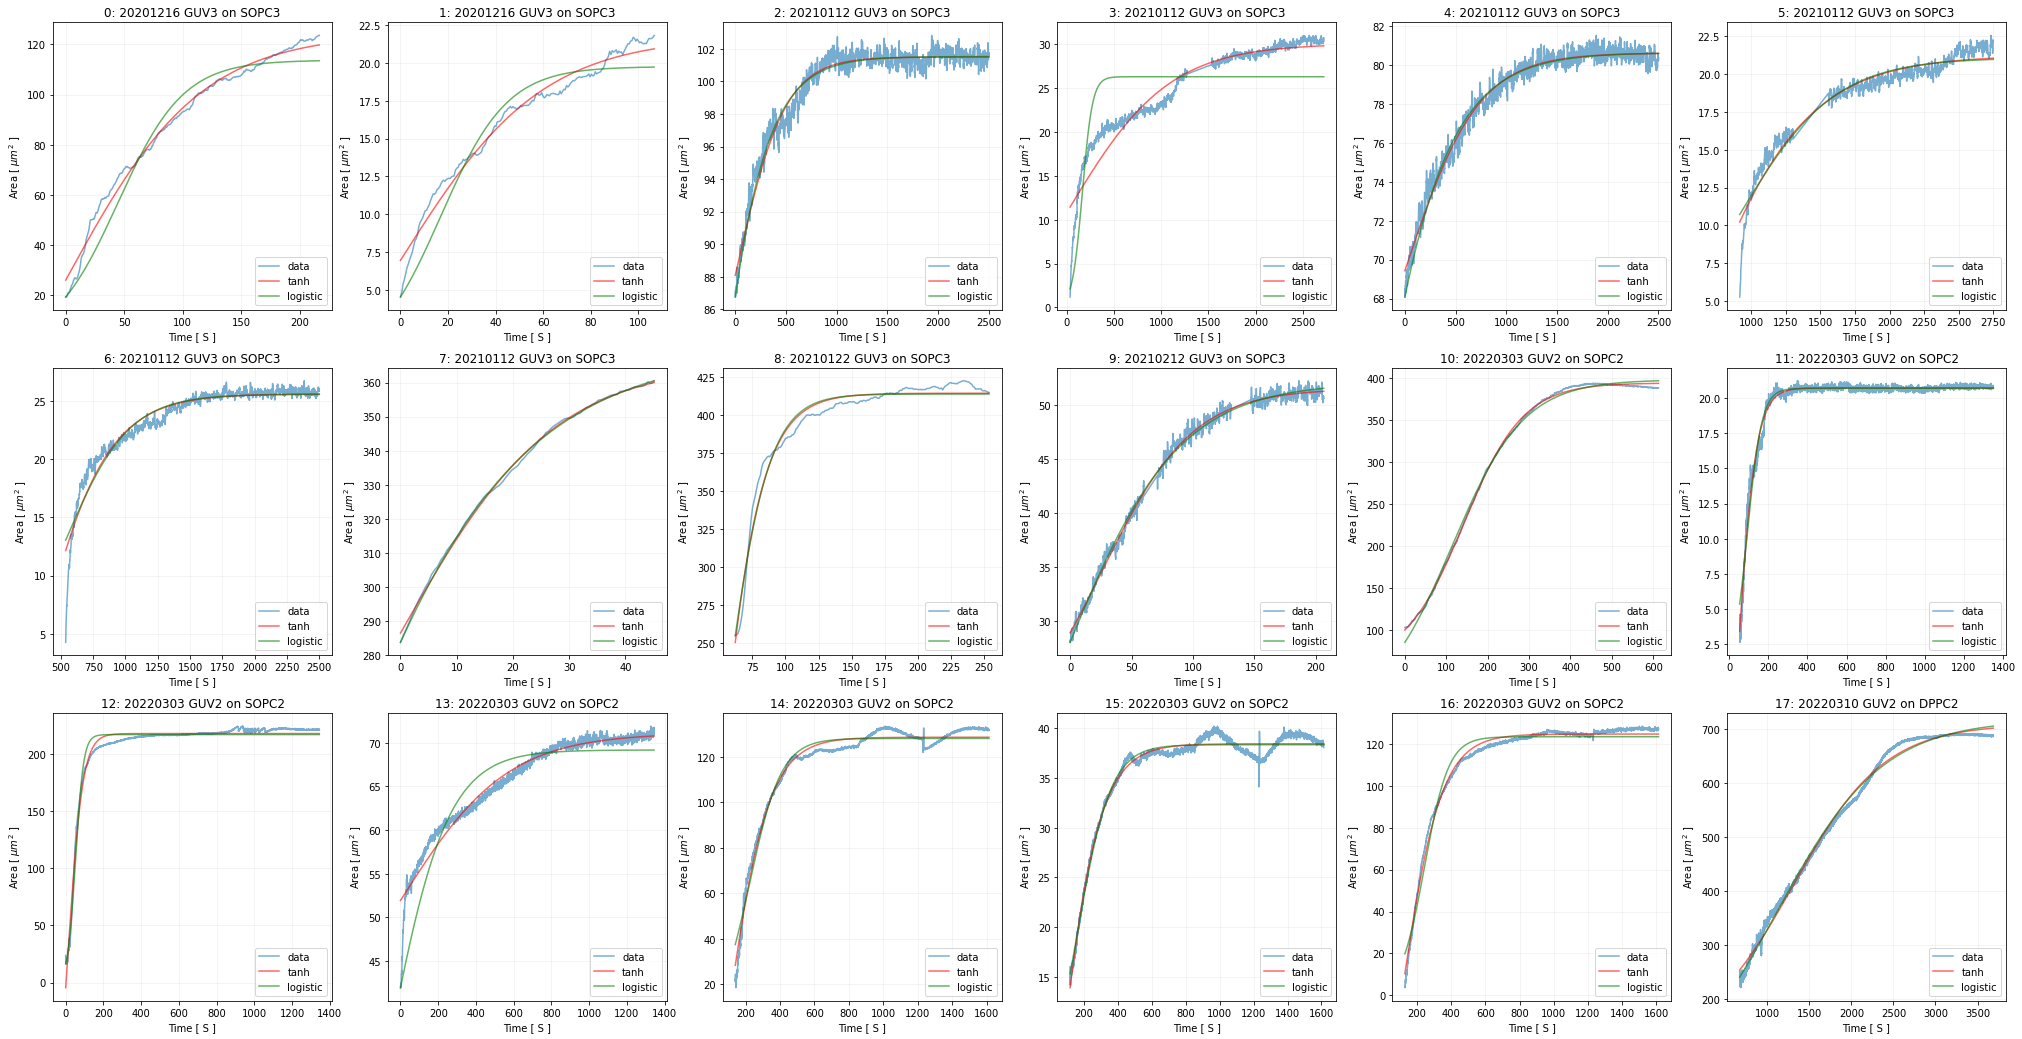

In [3]:
df = pd.read_pickle('Results/manipulated_area_curves.pkl')

parameters_tanh, parameters_logistic = [], []
for i in range(18):
    # Read the time and area
    t, A = df['Time'][i], df['Area'][i]
    
    # Fit a general tanh function to the curves 
    popt_tanh, _ = curve_fit(area_tanh, t, A,
                             p0=(np.max(A)-np.min(A), 0.01, 0, 0),
                             bounds=([0, 0.0001, 0, -np.max(A)], [np.max(A), 1, t[-1], 1.5*np.max(A)]))
    parameters_tanh.append(popt_tanh)
                   
    # Fit a general tanh function to the curves 
    popt_logistic, _ = curve_fit(area_logistic, t, A,
                                 p0=(1, 0.01, np.max(A)),
                                 bounds=([0.1, 0.00001, np.min(A)], [np.min(A), 1, 2*np.max(A)]))
    parameters_logistic.append(popt_logistic)
    
    # Define the figure size only once
    if i==0: plt.figure(figsize=(35, 18))
    
    plt.subplot(3, 6, i+1)
    plt.plot(t, A, label='data', alpha = 0.6)                                                   # data
    plt.plot(t, area_tanh(t, *popt_tanh), label='tanh', alpha = 0.6, color= 'r')                # tanh
    plt.plot(t, area_logistic(t, *popt_logistic), label='logistic', alpha = 0.6, color= 'g')    # logistic    
    plt.title(f'{i}: {df["Date"][i]} {df["Discription"][i]}')
    plt.xlabel('Time [ S ]')
    plt.ylabel('Area [ $\mu m^2$ ]')
    plt.grid(color = 'gray', alpha = 0.1)
    plt.legend(loc='lower right')
    
plt.savefig('Results/area_curves_with_weights_2')

### Increase the weights on the begining and ending of the curve

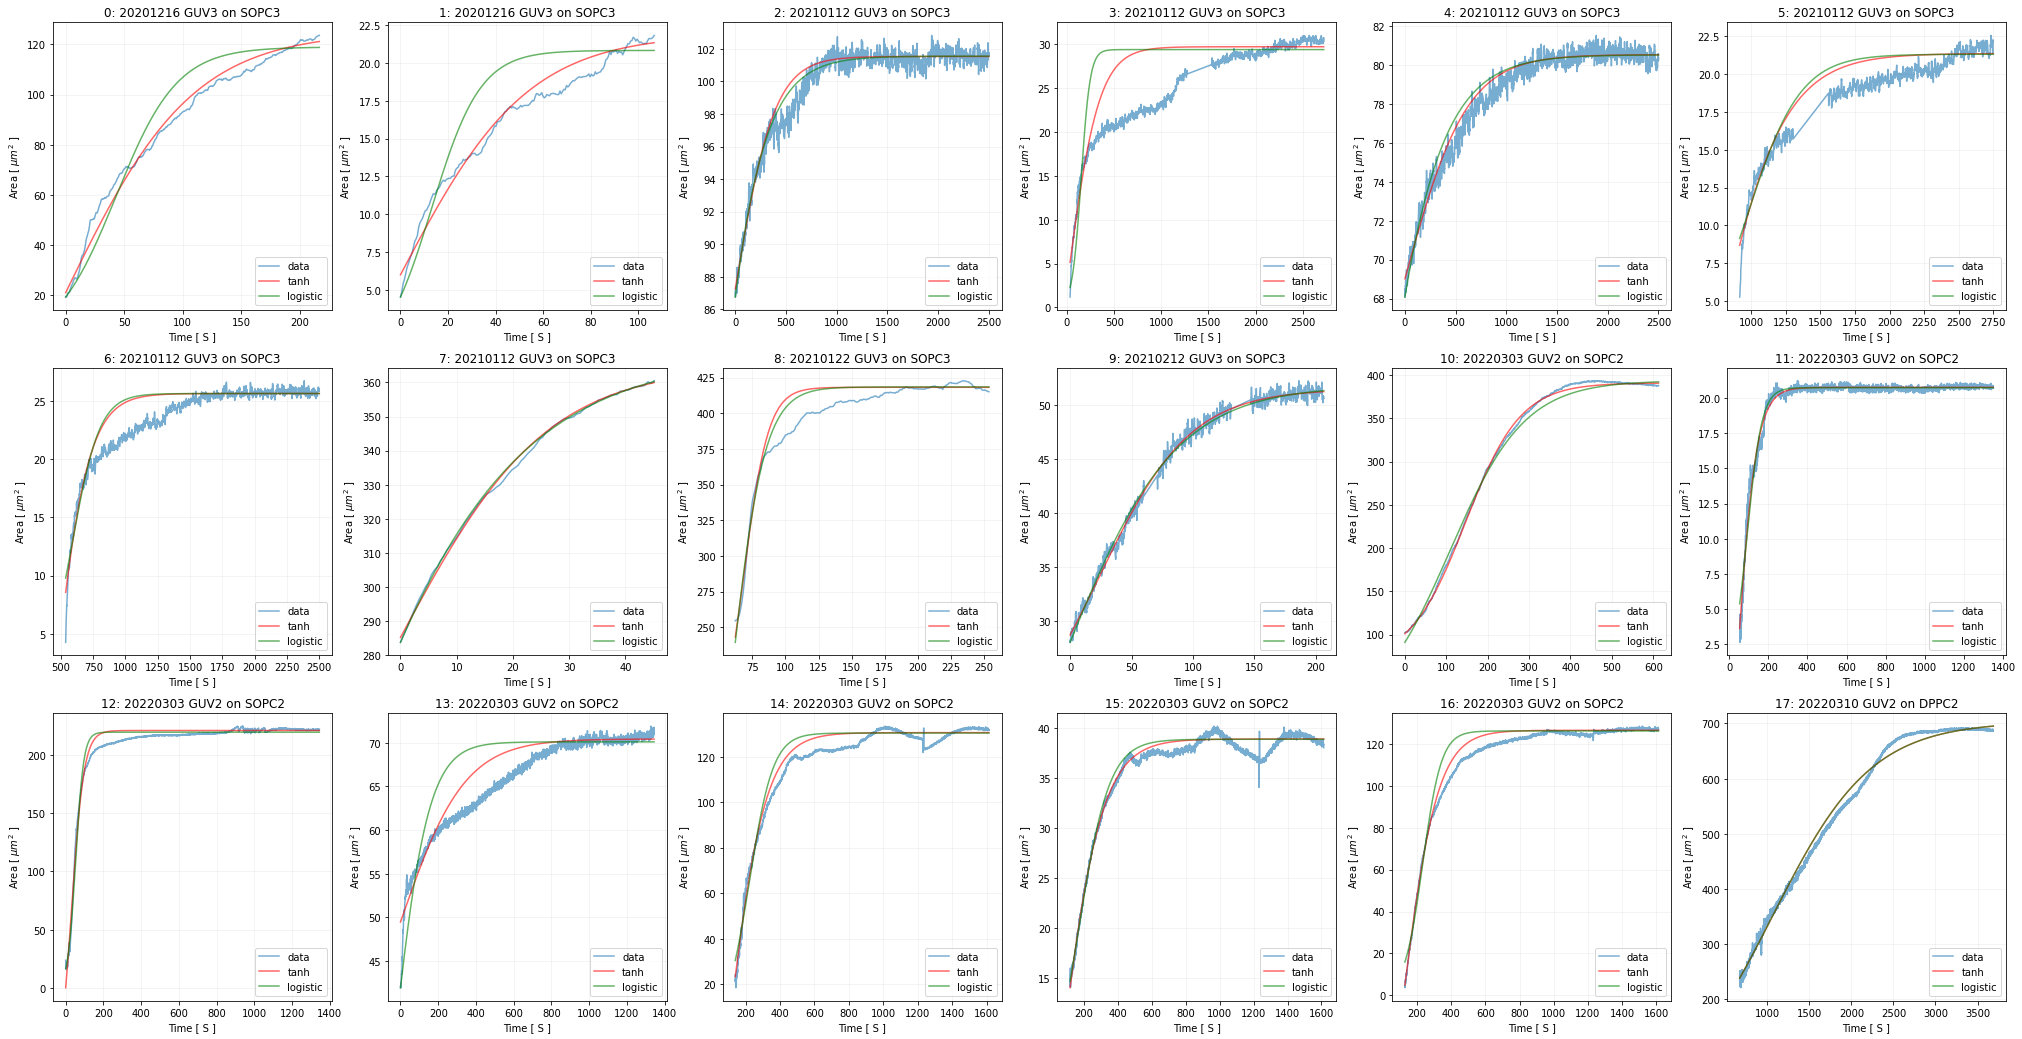

In [4]:
df = pd.read_pickle('Results/manipulated_area_curves.pkl')

parameters_tanh, parameters_logistic = [], []
for i in range(18):
    # Read the time and area
    t, A = df['Time'][i], df['Area'][i]
    
    # Create an array of weights
    l = t.shape[0]
    weights = np.ones(l) * (np.max(A)/100)
    weights[l//10:l-2*l//10] = weights[l//10:l-2*l//10] * 5
    
    # Fit a general tanh function to the curves 
    popt_tanh, _ = curve_fit(area_tanh, t, A, sigma=weights,
                             p0=(np.max(A)-np.min(A), 0.01, 0, 0),
                             bounds=([0, 0.0001, 0, -np.max(A)], [np.max(A), 1, t[-1], 1.5*np.max(A)]))
    parameters_tanh.append(popt_tanh)
                   
    # Fit a general tanh function to the curves 
    popt_logistic, _ = curve_fit(area_logistic, t, A, sigma=weights,
                                 p0=(1, 0.01, np.max(A)),
                                 bounds=([0.1, 0.00001, np.min(A)], [np.min(A), 1, 2*np.max(A)]))
    parameters_logistic.append(popt_logistic)
    
    # Define the figure size only once
    if i==0: plt.figure(figsize=(35, 18))
    
    plt.subplot(3, 6, i+1)
    plt.plot(t, A, label='data', alpha = 0.6)                                                   # data
    plt.plot(t, area_tanh(t, *popt_tanh), label='tanh', alpha = 0.6, color= 'r')                # tanh
    plt.plot(t, area_logistic(t, *popt_logistic), label='logistic', alpha = 0.6, color= 'g')    # logistic    
    plt.title(f'{i}: {df["Date"][i]} {df["Discription"][i]}')
    plt.xlabel('Time [ S ]')
    plt.ylabel('Area [ $\mu m^2$ ]')
    plt.grid(color = 'gray', alpha = 0.1)
    plt.legend(loc='lower right')
    
plt.savefig('Results/area_curves_2')

### Save the parameters to the data frame

In [5]:
# Save the initial data frame with proper name
df.to_pickle('Results/manipulated_area_curves_2.pkl')

# Add columns for the model to the data frame
df['Model_tanh'] = parameters_tanh
df['Model_logistic'] = parameters_logistic

# Save the results data frame as pickle
df.to_pickle('Results/result_area_curves_2.pkl')

# Save a csv and excel to be used out of python
df.drop(['Time', 'Area'], axis=1).to_csv('Results/result_area_curves_2.csv', index=False)
df.drop(['Time', 'Area'], axis=1).to_excel('Results/result_area_curves_2.xlsx', index=False)

df

,Date,Protein,Discription,Name,Time,Area,Model_tanh,Model_logistic
0,20201216,Mouse Ecad,GUV3 on SOPC3,Calib_camera1and2-1,"[0.0, 0.55, 1.1, 1.65, 2.2, 2.75, 3.3000000000...","[19.203125, 19.15625, 19.484375, 20.359375, 20...","[104.08322506653063, 0.009177310883639015, 7.0...","[19.156249999999996, 0.038289463810987405, 118..."
1,20201216,Mouse Ecad,GUV3 on SOPC3,Calib_camera3-3,"[0.0, 0.55, 1.1, 1.65, 2.2, 2.75, 3.3000000000...","[4.53125, 4.859375, 5.40625, 5.6875, 6.078125,...","[15.917866791788681, 0.018613718403517696, 4.6...","[4.531249999999999, 0.09740332517502316, 20.82..."
2,20210112,Mouse Ecad,GUV3 on SOPC3,movie-200-550ms-1200-1sec_240_1200-1sec-1,"[0.0, 0.55, 1.1, 1.65, 2.2, 2.75, 3.3000000000...","[87.140625, 86.953125, 86.765625, 86.75, 86.93...","[14.27329234905224, 0.002584463787273802, 2.41...","[86.74999999999996, 0.0038491015062845457, 101..."
3,20210112,Mouse Ecad,GUV3 on SOPC3,movie-200-550ms-1200-1sec_240_1200-1sec-2,"[33.0, 33.55, 34.1, 34.65, 35.2, 35.75, 36.3, ...","[1.1875, 1.28125, 1.25, 1.59375, 1.765625, 2.0...","[27.258367782814958, 0.002988717422746241, 2.1...","[1.1874999999999993, 0.021041224916650933, 29...."
4,20210112,Mouse Ecad,GUV3 on SOPC3,movie-200-550ms-1200-1sec_240_1200-1sec-3,"[0.0, 0.55, 1.1, 1.65, 2.2, 2.75, 3.3000000000...","[68.078125, 68.203125, 68.515625, 68.34375, 68...","[11.513733525941953, 0.0016349799060122396, 1....","[68.07812499999999, 0.0029551419827528497, 80...."
5,20210112,Mouse Ecad,GUV3 on SOPC3,movie-200-550ms-1200-1sec_240_1200-1sec-4,"[916.0, 917.0, 918.0, 919.0, 920.0, 921.0, 922...","[5.265625, 5.40625, 5.515625, 5.875, 6.0625, 6...","[22.562499999999996, 0.0019700719345627045, 67...","[0.1363590258943331, 0.0051951345364842135, 21..."
6,20210112,Mouse Ecad,GUV3 on SOPC3,movie-200-550ms-1200-1sec_240_1200-1sec-5,"[537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543...","[4.265625, 4.859375, 5.3125, 5.96875, 6.203125...","[26.734374999999993, 0.003760911098606348, 436...","[0.10000000000049183, 0.00942218511964467, 25...."
7,20210112,Mouse Ecad,GUV3 on SOPC3,movie-550ms-1,"[0.0, 0.55, 1.1, 1.65, 2.2, 2.75, 3.3000000000...","[283.78125, 285.921875, 287.90625, 290.109375,...","[79.63532129139286, 0.03817521258393916, 3.300...","[283.78124999999994, 0.057695921648478365, 368..."
8,20210122,Mouse Ecad,GUV3 on SOPC3,movie-1200-3sec-1,"[62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 7...","[254.59375, 255.1875, 256.03125, 258.53125, 26...","[130.4985921679253, 0.053837855864257635, 68.6...","[3.9879019340021222, 0.07958635321637536, 418...."
9,20210212,Mouse Ecad,GUV3 on SOPC3,movie-600_11_600_16_600-10ms-1,"[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6000000000000...","[28.1875, 28.0, 28.203125, 28.078125, 28.07812...","[17.44909083552029, 0.013432402572159089, 23.5...","[27.999999999999996, 0.02185166483469581, 51.7..."


### Print the fitted equations

In [6]:
for i, parameter in enumerate(parameters_tanh):
    print(i, ' --> {:.1f} tanh[{:.1e} (t - {:.1e})] + {:.1f}'.format(*parameter))

0  --> 104.1 tanh[9.2e-03 (t - 7.0e-25)] + 20.9
1  --> 15.9 tanh[1.9e-02 (t - 4.6e-24)] + 6.0
2  --> 14.3 tanh[2.6e-03 (t - 2.4e-11)] + 87.3
3  --> 27.3 tanh[3.0e-03 (t - 2.1e-17)] + 2.5
4  --> 11.5 tanh[1.6e-03 (t - 1.0e-10)] + 69.0
5  --> 22.6 tanh[2.0e-03 (t - 6.8e+02)] + -1.2
6  --> 26.7 tanh[3.8e-03 (t - 4.4e+02)] + -1.1
7  --> 79.6 tanh[3.8e-02 (t - 3.3e-15)] + 285.2
8  --> 130.5 tanh[5.4e-02 (t - 6.9e+01)] + 287.7
9  --> 17.4 tanh[1.3e-02 (t - 2.4e+01)] + 34.0
10  --> 161.0 tanh[7.5e-03 (t - 1.5e+02)] + 230.0
11  --> 21.2 tanh[1.0e-02 (t - 3.4e+01)] + -0.5
12  --> 152.9 tanh[1.5e-02 (t - 3.1e+01)] + 67.8
13  --> 21.0 tanh[2.9e-03 (t - 1.7e-23)] + 49.5
14  --> 133.7 tanh[4.7e-03 (t - 9.8e+01)] + -2.9
15  --> 34.4 tanh[4.1e-03 (t - 4.9e+01)] + 4.6
16  --> 128.5 tanh[4.9e-03 (t - 1.2e+02)] + -2.0
17  --> 350.2 tanh[8.5e-04 (t - 1.1e+03)] + 353.1


In [7]:
for i, parameter in enumerate(parameters_logistic):
    print(i, 'A0 = {:.1f}, r = {:.5f}, k = {:.1f}'.format(*parameter))

0 A0 = 19.2, r = 0.03829, k = 119.0
1 A0 = 4.5, r = 0.09740, k = 20.8
2 A0 = 86.7, r = 0.00385, k = 101.6
3 A0 = 1.2, r = 0.02104, k = 29.4
4 A0 = 68.1, r = 0.00296, k = 80.5
5 A0 = 0.1, r = 0.00520, k = 21.3
6 A0 = 0.1, r = 0.00942, k = 25.6
7 A0 = 283.8, r = 0.05770, k = 368.2
8 A0 = 4.0, r = 0.07959, k = 418.4
9 A0 = 28.0, r = 0.02185, k = 51.8
10 A0 = 91.0, r = 0.01106, k = 393.7
11 A0 = 1.6, r = 0.02685, k = 20.7
12 A0 = 16.3, r = 0.04757, k = 219.3
13 A0 = 42.0, r = 0.01099, k = 70.1
14 A0 = 5.0, r = 0.01454, k = 130.6
15 A0 = 5.6, r = 0.01084, k = 38.9
16 A0 = 1.7, r = 0.01846, k = 126.2
17 A0 = 99.0, r = 0.00170, k = 703.4


### Plot the growth rate vs carrying capacity'

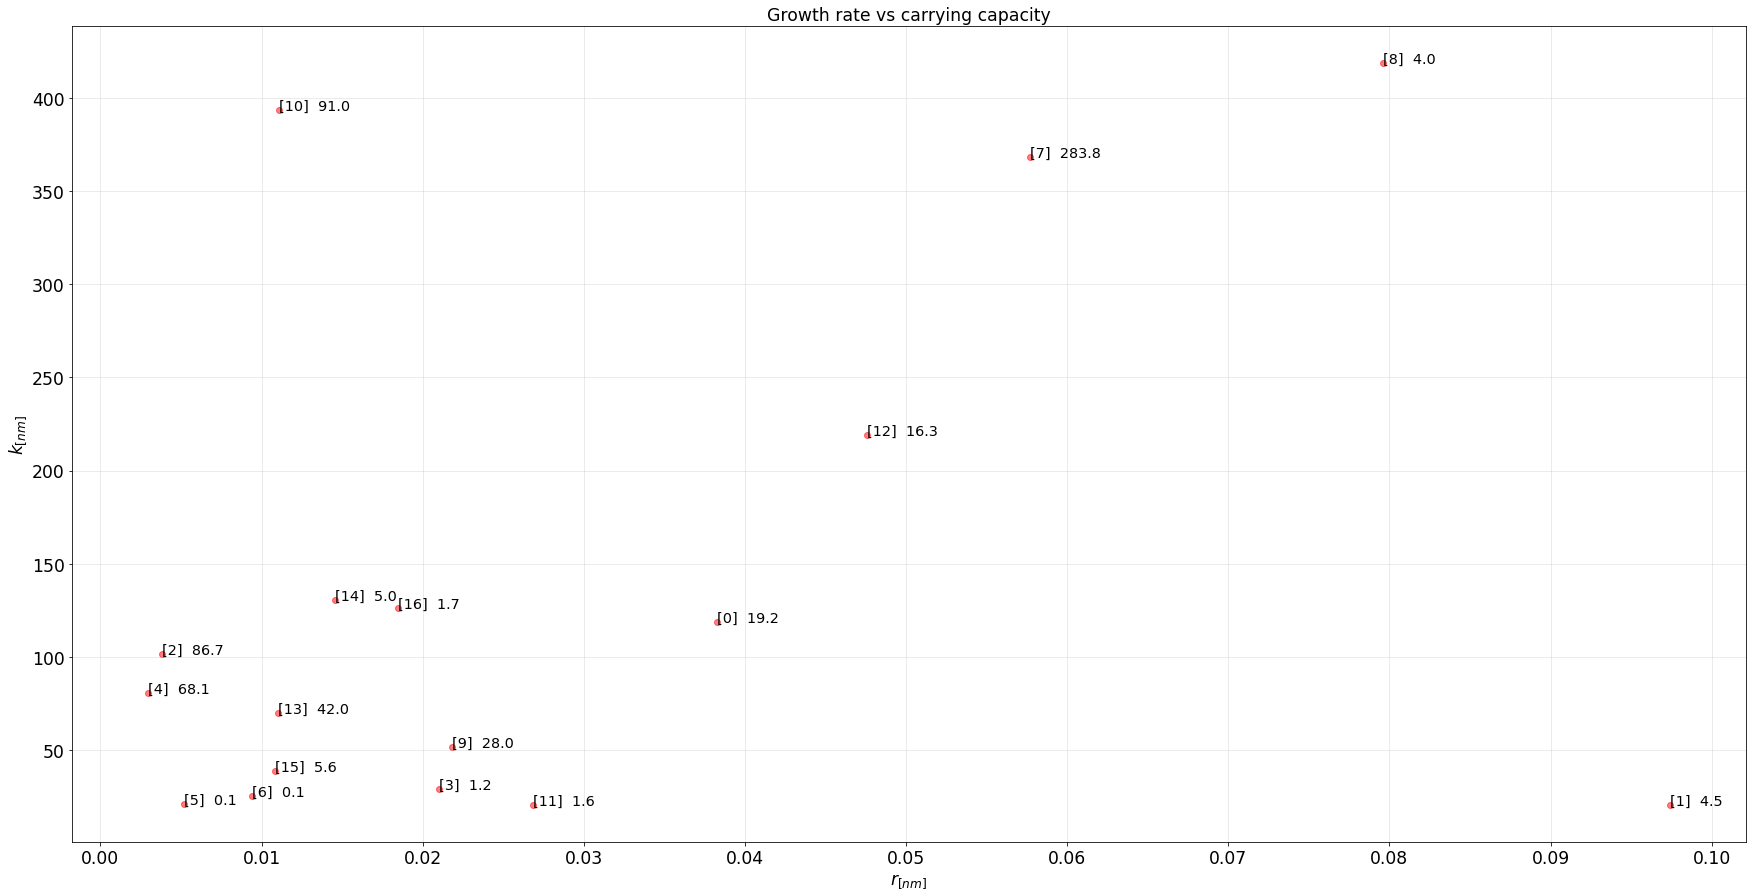

In [8]:
# Extract the logistic parameters excluding the DPPC curve
r = [parameter[1] for parameter in df['Model_logistic'][:-1]]
k = [parameter[2] for parameter in df['Model_logistic'][:-1]]
a = [parameter[0] for parameter in df['Model_logistic'][:-1]]

plt.figure(figsize=(30,15))
plt.scatter(r, k, color='red', alpha = 0.5)
for i, A in enumerate(a): plt.annotate(f'[{i}]  {A:.1f}', (r[i], k[i]), fontsize='x-large')
plt.xlabel('$r_{[nm]}$', fontsize='xx-large')
plt.ylabel('$k_{[nm]}$', fontsize='xx-large')
plt.title('Growth rate vs carrying capacity', fontsize='xx-large')
plt.xticks(np.arange(0,0.11,0.01), fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.grid(alpha = 0.3)
plt.savefig('Results/Growth_rate_vs_carrying_capacity')